In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#url = https://archive.ics.uci.edu/dataset/445/absenteeism+at+work
df = pd.read_csv('Absenteeism_at_work.csv',delimiter = ';')

In [10]:
df.shape

(740, 21)

In [11]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [12]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [6]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [26]:
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

This dataset has 740 absence records from 36 employees.

In [31]:
df[df['Month of absence']==0]
#three records has the Month of absence set to 0, which makes no sense. It's probablly a human mistake.
df = df[df['Month of absence'] != 0]
#drop these rows

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


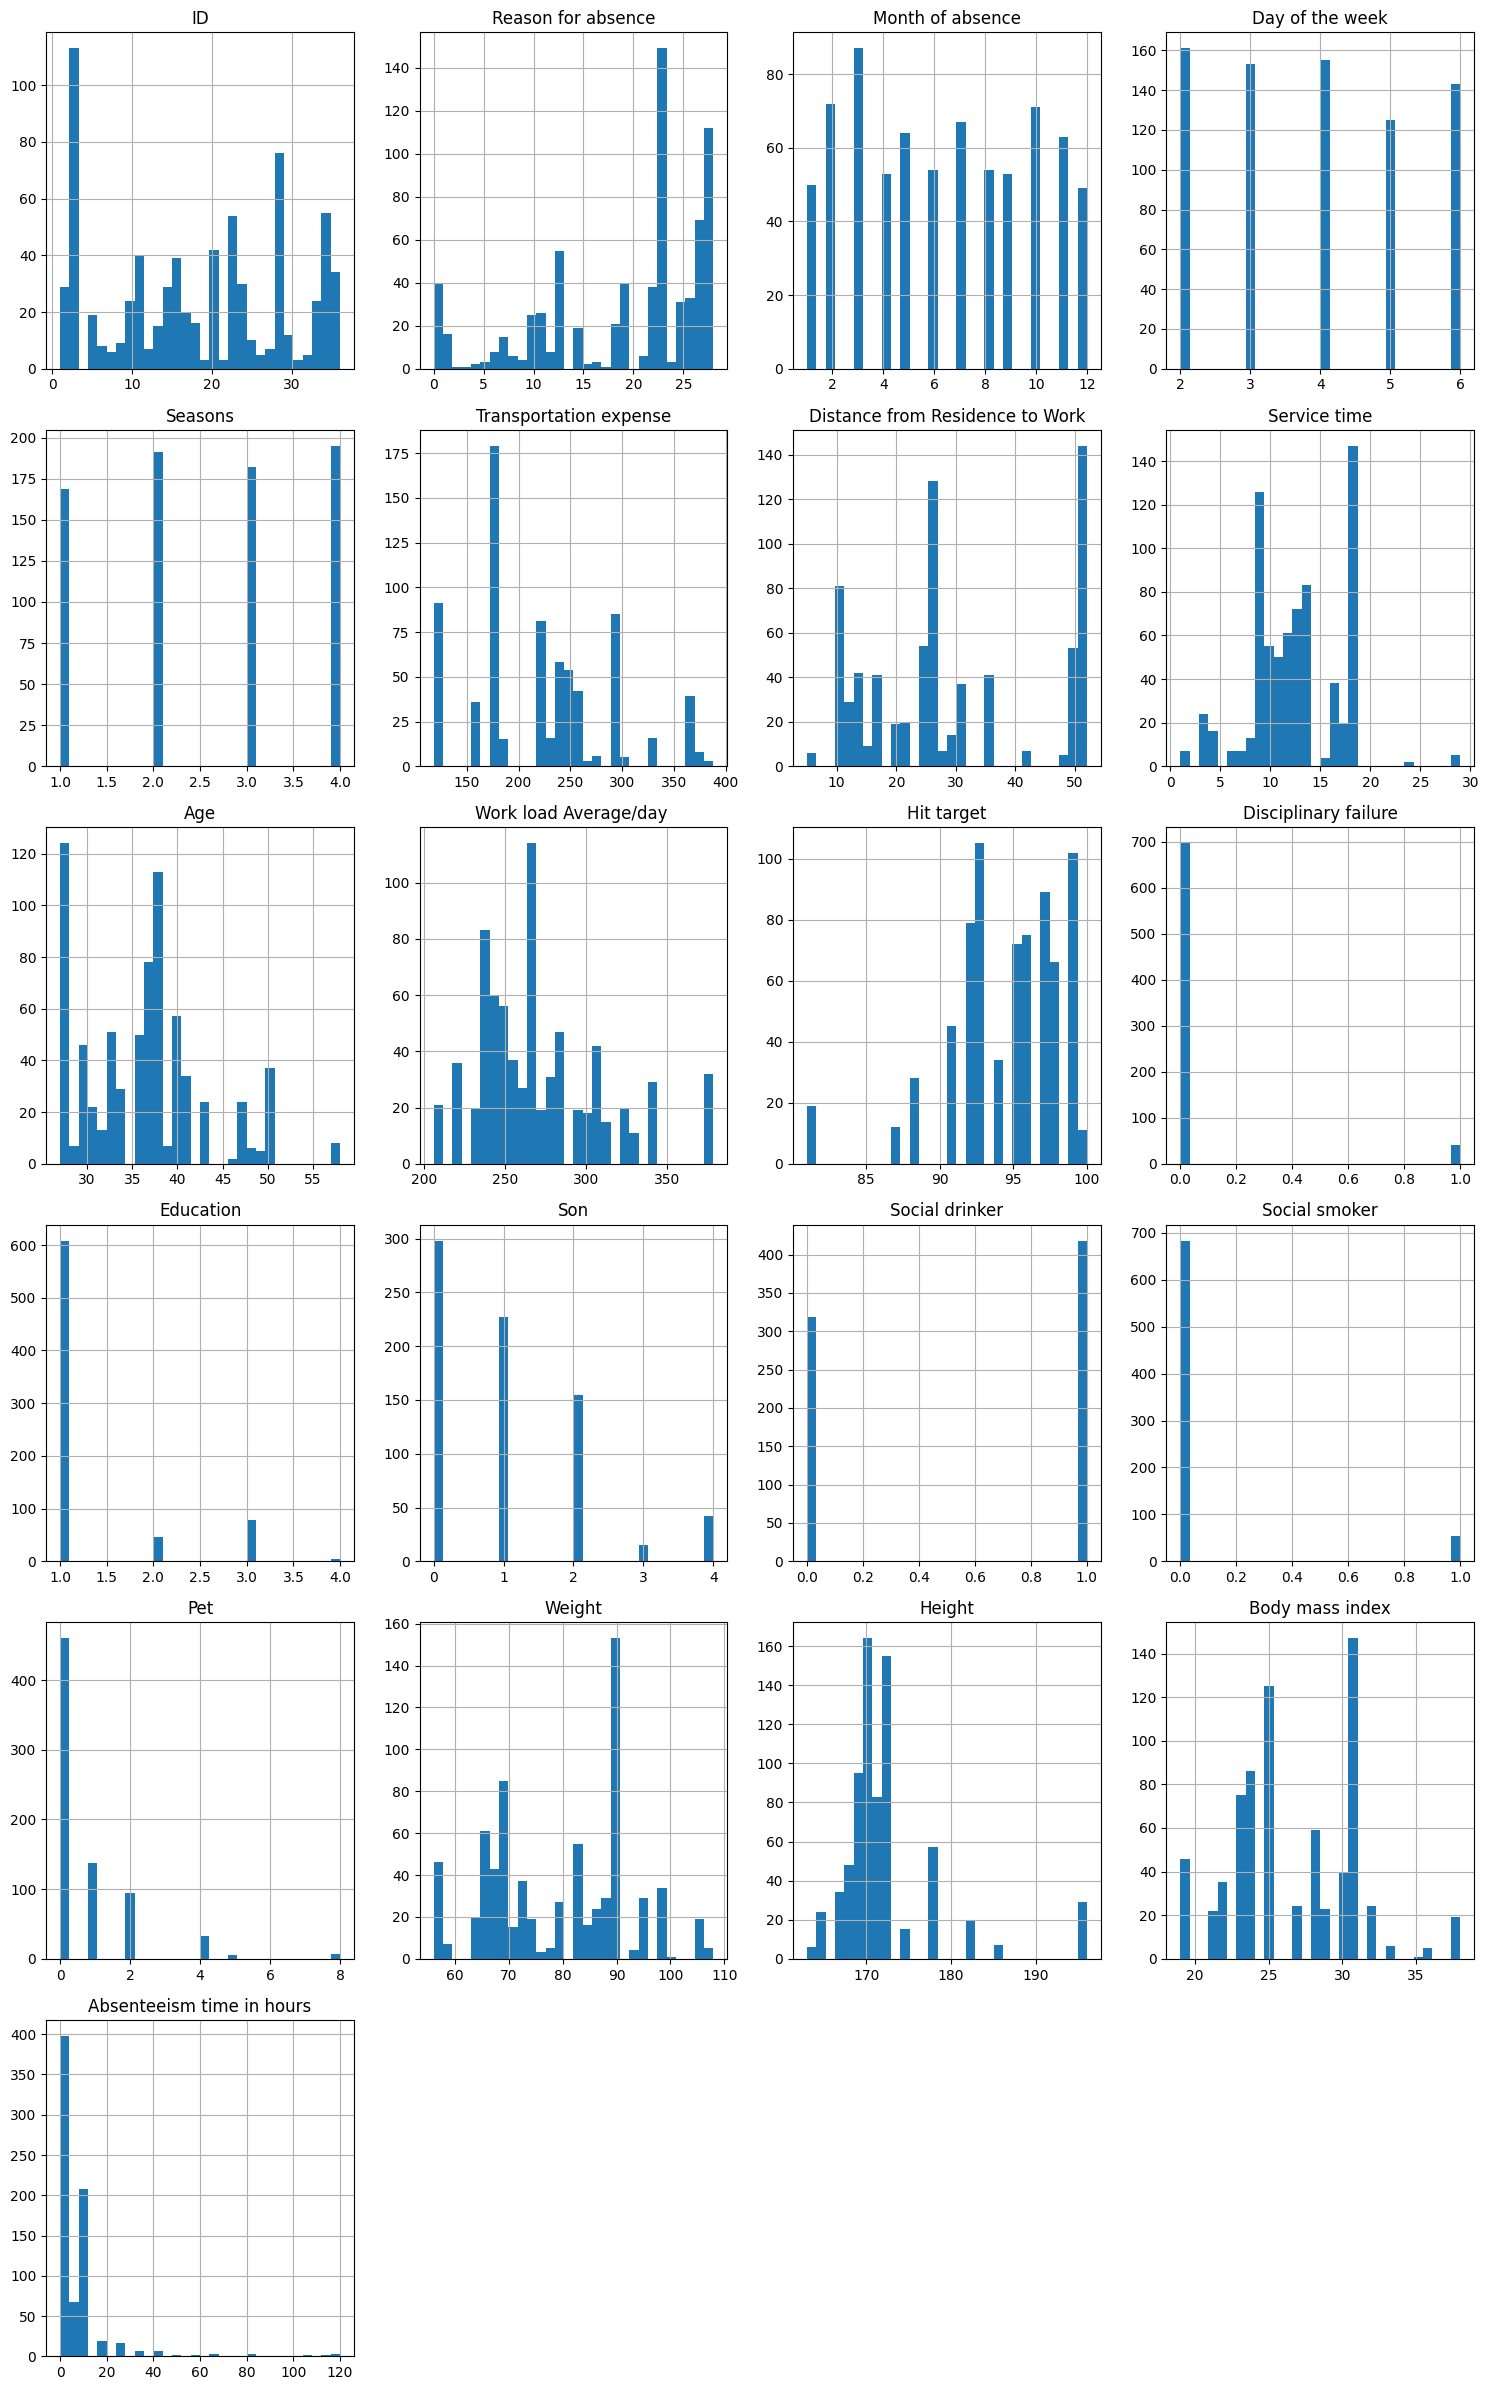

In [38]:
df.hist(bins=30, figsize=(15, 4 * 6), layout=(6, 4))
plt.tight_layout()
plt.show()

In [37]:
df['Reason for absence'].value_counts().head(5)

23    149
28    112
27     69
13     55
19     40
Name: Reason for absence, dtype: int64

Refering to the attribute information, the top 5 reasons for absences are: *medical consultation*, *dental consultation*, *physiotherapy*, *Diseases of the musculoskeletal system and connective tissue*, and *Injury, poisoning and certain other consequences of external causes*

We also observe that the day in week and month of the year seem to be evenly distributed - they do not seem to indluence the frequency of absence; and we're not yet sure if they have any influence on the duration of absence.

###My first Hypothesis is: Intuitively, Absenteeism time should be under the influence of the Reason for absence.

The correlation coefficient doesn't give us any insight on this one, as the Reason for absence column is represented in int but is categorical in nature. We will do some categorical variable analysis.

In [43]:
grouped_data = df.groupby('Reason for absence')['Absenteeism time in hours'].mean()
print(grouped_data.sort_values(ascending=False))


Reason for absence
9     42.000000
2     24.000000
12    23.375000
6     21.375000
19    18.225000
13    15.309091
11    11.423077
1     11.375000
10    11.040000
18    10.333333
7     10.000000
14     8.789474
24     8.000000
15     8.000000
17     8.000000
3      8.000000
22     7.710526
26     7.272727
5      6.333333
21     5.833333
8      5.333333
4      4.500000
25     3.483871
28     2.991071
23     2.845638
27     2.275362
16     2.000000
0      0.000000
Name: Absenteeism time in hours, dtype: float64


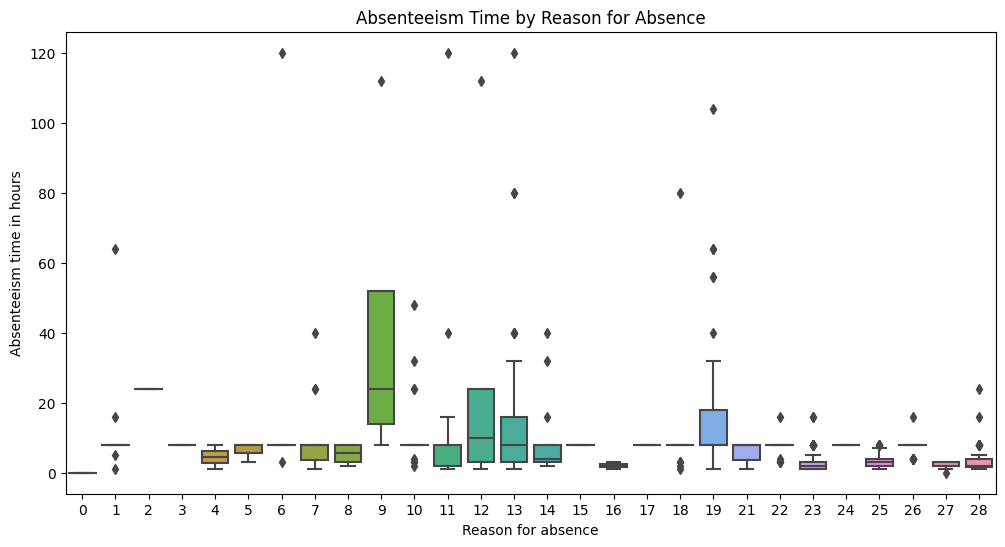

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Reason for absence', y='Absenteeism time in hours', data=df)
plt.title('Absenteeism Time by Reason for Absence')
plt.show()


There seem to be a correlation. It's especially clear for reason 9, Diseases of the circulatory system.

In [52]:
import scipy.stats as stats
grouped_data = [df['Absenteeism time in hours'][df['Reason for absence'] == reason] for reason in df['Reason for absence'].unique()]
anova_result = stats.f_oneway(*grouped_data)
print("ANOVA test result:", anova_result)

ANOVA test result: F_onewayResult(statistic=7.084228441959724, pvalue=4.1524819278626724e-23)


 The ANOVA reports a pvalue= 4e-23. With that, we can conclude with high confidence that the reason for absence has a significant effect on the absenteeism time in hours.

###My second Hypothesis is: People with more Service time tend to be absent less.

To test this, we'll aggregate the total absence count and total absence time for each employee.

In [102]:
absence_agg = df.groupby('ID')['Absenteeism time in hours'].agg(['sum', 'count']).reset_index()
absence_agg.columns = ['ID', 'Total Absence Time', 'Total Absence Count']

service_data = df[['ID', 'Service time']].drop_duplicates()
combined_data = pd.merge(absence_agg, children_data, on='ID')

In [103]:
correlation = combined_data[['Total Absence Time', 'Total Absence Count', 'Service time']].corr()
print(correlation)

                     Total Absence Time  Total Absence Count  Service time
Total Absence Time             1.000000             0.819151      0.088948
Total Absence Count            0.819151             1.000000      0.051885
Service time                   0.088948             0.051885      1.000000


The correlation coeffecient shows very weak correlations.

In [100]:
import statsmodels.api as sm
X = combined_data['Service time']
y = combined_data['Total Absence Time']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Absence Time   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.2632
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.611
Time:                        17:06:26   Log-Likelihood:                -223.94
No. Observations:                  35   AIC:                             451.9
Df Residuals:                      33   BIC:                             455.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          117.2088     63.348      1.850   

In [101]:
y_count = combined_data['Total Absence Count']
model_count = sm.OLS(y_count, X).fit()
print(model_count.summary())


                             OLS Regression Results                            
Dep. Variable:     Total Absence Count   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                 -0.028
Method:                  Least Squares   F-statistic:                   0.08908
Date:                 Sun, 03 Dec 2023   Prob (F-statistic):              0.767
Time:                         17:06:29   Log-Likelihood:                -159.95
No. Observations:                   35   AIC:                             323.9
Df Residuals:                       33   BIC:                             327.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.4152     10.178    

With p-values this large, we can reject our alternative hypothesis, and say that there is no statistically significant relationship between the Service time of an employee and their absenteeism.

###A lot of absences are due to health issures. Let's explore if health-related data can be used to predict total absence time.

In [172]:
employee_absence = df.groupby('ID')['Absenteeism time in hours'].sum().reset_index()
employee_absence.columns = ['ID', 'Total Absence Time']

person_specific_data = df[['ID', 'Weight','Height','Body mass index','Social drinker','Social smoker']].drop_duplicates()
df_merged = pd.merge(employee_absence, person_specific_data, on='ID')

<Axes: >

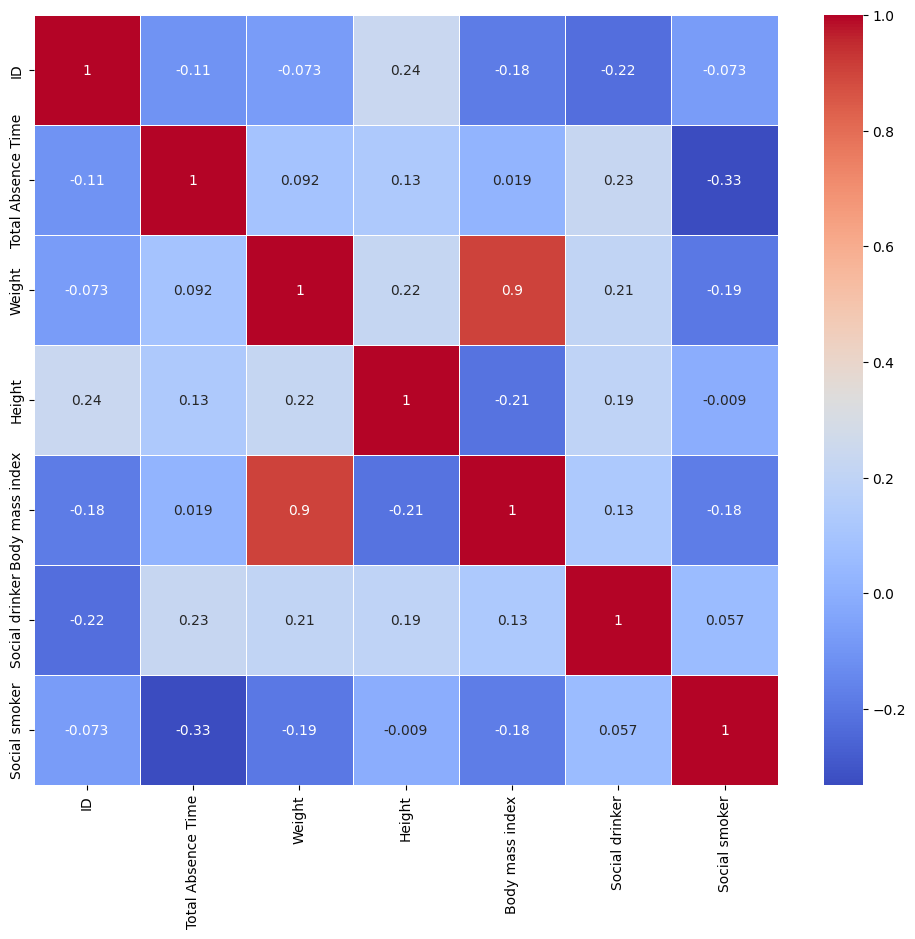

In [179]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm', linewidths=.5)

Interesting finding: smoking is negativly correlated with total absence time.

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

X = df_merged.drop(['ID', 'Total Absence Time'], axis=1)
y = df_merged['Total Absence Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [174]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 14191.773944767416


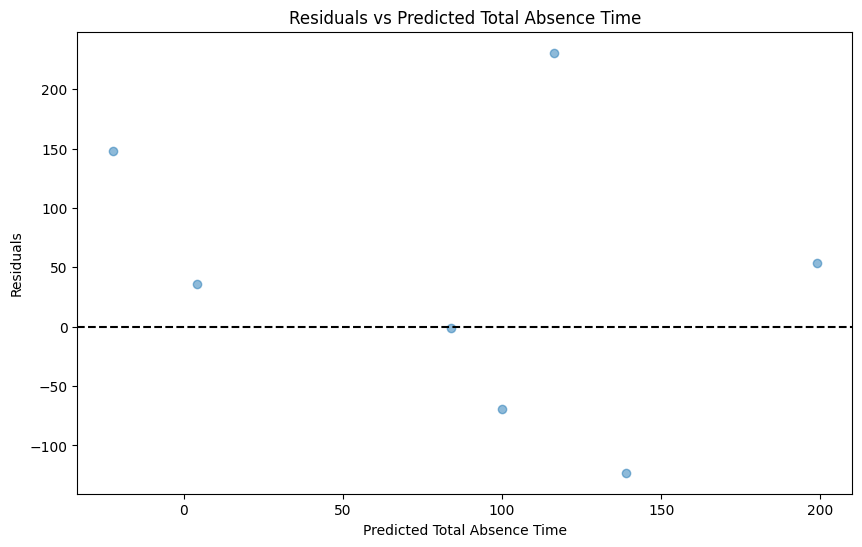

In [175]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Total Absence Time')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Total Absence Time')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()


Our multilinear model with health-related features seem to perform very poorly.

In [176]:
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Absence Time   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.150
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.364
Time:                        17:37:04   Log-Likelihood:                -177.16
No. Observations:                  28   AIC:                             366.3
Df Residuals:                      22   BIC:                             374.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             906.1022   3390.188     

None of these features has a statsically significant p-value, but we can see weither a person drinks or smokes is more predictive than other features.